# Ultimate Data Challenge

## Part 1 ‑ Exploratory data analysis

Aggregate these login counts based on 15-minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand.

In [97]:
# imported necessary libraries and packages

import pandas as pd
import numpy as np
import json
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


In [2]:
# used pd.read_json() to read in json file as a dataframe; looked at first 5 entries of df

df = pd.read_json('logins.json')
df.head().sort_values(by='login_time')


,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
3,1970-01-01 20:16:36
2,1970-01-01 20:16:37
4,1970-01-01 20:26:21


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [7]:
intervals = df.resample('15min',on='login_time').count()
intervals.head()

,login_time
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


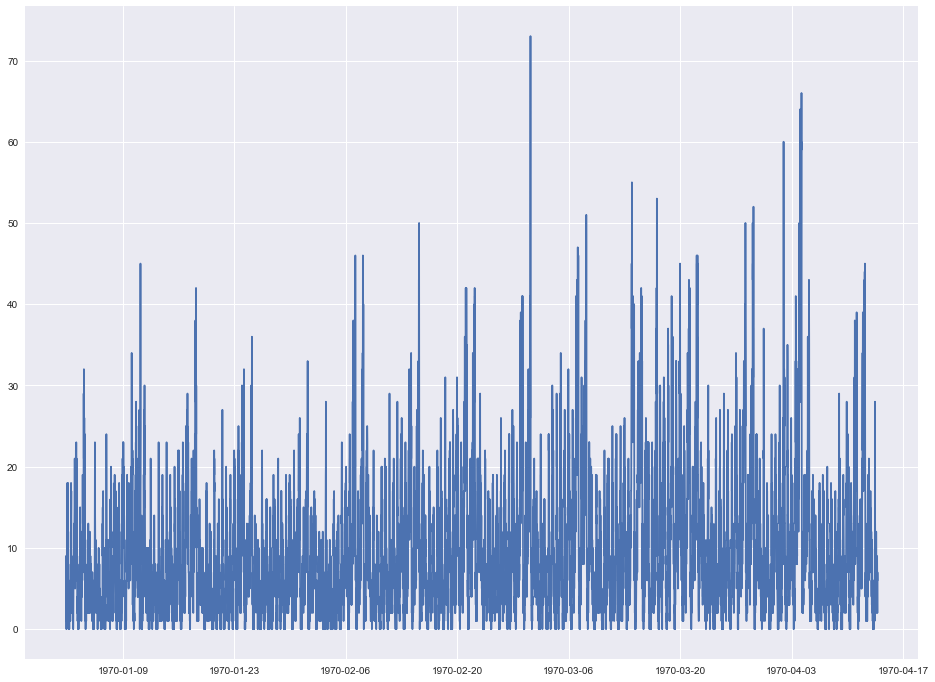

In [14]:
sns.set()
plt.figure(figsize =(16,12))
plt.plot(intervals)
plt.show()



## Part 2 ‑ Experiment and metrics design

#### What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?


If the experiment is simply to see if we can encourage drivers to serve both cities, I would create a metric for the ratio of rides given between cities for each driver, and see if the average ratio approaches 0.50. 

However, as the ultimate purpose of doing encouraging drivers to serve both cities would be to improve the efficiency of matching up drivers to their riders, and therefore, make it so that drivers can give more rides during the same time period, an increase to overall profit would be needed to validate reimbursements.

Nonetheless, for the purpose of this specific experiment, we will isolate the measure of success to the ratio of rides between cities for now.

#### Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
* how you will implement the experiment
* what statistical test(s) you will conduct to verify the significance of the observation
* how you would interpret the results and provide recommendations to the city operations team along with any caveats.

An A/B test would help determine if the proposed change made a difference. To implement the test, half of drivers would be randomly chosen to have reimbursements for bridge tolls. After a pre-determined period of time, such as two weeks, the effectiveness of the change could be evaluated.

A statistical test such as a difference of means could be used to verify the significance of the difference in the ratios. 

If the experiments creates a significant change in the ratio of rides between cities, it may be worth it to consider implementing the change for all drivers. However, the cost of the reimbursements has to create an increase in profit, efficiency, or perhaps some other 



## Part 3 - Predictive modeling

#### `1.` Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

In [127]:
df2 = json.load((open('ultimate_data_challenge.json')))
df2 = pd.DataFrame(df2)

df2.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [128]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [129]:
df2 = df2.dropna(subset=['phone'])

In [130]:
df2['avg_rating_by_driver'] = df2['avg_rating_by_driver'].fillna(value=df2.avg_rating_by_driver.mean())
df2['avg_rating_of_driver'] = df2['avg_rating_of_driver'].fillna(value=df2.avg_rating_of_driver.mean())

In [131]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49604 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  49604 non-null float64
avg_rating_by_driver      49604 non-null float64
avg_rating_of_driver      49604 non-null float64
avg_surge                 49604 non-null float64
city                      49604 non-null object
last_trip_date            49604 non-null object
phone                     49604 non-null object
signup_date               49604 non-null object
surge_pct                 49604 non-null float64
trips_in_first_30_days    49604 non-null int64
ultimate_black_user       49604 non-null bool
weekday_pct               49604 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.6+ MB


In [132]:
df2[['last_trip_date', 'signup_date']] = df2[['last_trip_date', 'signup_date']].astype('datetime64[ns]')

In [133]:
latest_time = df2.last_trip_date.max()

In [134]:
time30days = timedelta(days=30)

In [135]:
active = [1 if x >= latest_time-time30days else 0 for x in df2.last_trip_date]

df2['active'] = active

df2.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0


In [136]:
print('Active Users: ', df2.active.sum()/len(df2))

Active Users:  0.37640109668575117


About 37.6% of users who signed up in January are still active.

#### `2.` Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.


Because we are predicting 2 classes, I will be trying a logistic regression model to predict if a user belongs in the "Active" class, which is 1 in the DataFrame.

In [137]:
df2.ultimate_black_user = df2.ultimate_black_user.astype('int')

In [138]:
df2 = pd.get_dummies(df2)


In [139]:
df2.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,last_trip_date,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
0,3.67,5.0,4.7,1.10,2014-06-17,2014-01-25,15.4,4,1,46.2,1,0,1,0,0,1
1,8.26,5.0,5.0,1.00,2014-05-05,2014-01-29,0.0,0,0,50.0,0,1,0,0,1,0
2,0.77,5.0,4.3,1.00,2014-01-07,2014-01-06,0.0,3,0,100.0,0,1,0,0,0,1
3,2.36,4.9,4.6,1.14,2014-06-29,2014-01-10,20.0,9,1,80.0,1,0,1,0,0,1
4,3.13,4.9,4.4,1.19,2014-03-15,2014-01-27,11.8,14,0,82.4,0,0,0,1,1,0


In [140]:
y = df2['active']
X = df2.drop(['active', 'last_trip_date', 'signup_date'], axis=1)

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [142]:
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [143]:
c_space = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
param_grid = {'C': c_space}

logreg_cv = GridSearchCV(logreg, param_grid, cv=5)
logreg_cv.fit(X_train, y_train)

print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))

Tuned Logistic Regression Parameter: {'C': 0.01}


In [144]:
logreg = LogisticRegression(C=0.1)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [145]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.74      0.84      0.79      6222
          1       0.66      0.50      0.57      3699

avg / total       0.71      0.72      0.71      9921



#### `3.` Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice).

From the model, we can rank the features by importance to the model. We can use a statistical technique, such as a chi-squared statistic, or even a model, such as random forest. By doing so, we are able to prioritize elements that Ultimate should address to increase the likelihood of retention. 

For instance, if the phone type is highly predictive of retention, then perhaps Ultimate could examine and improve their iOS or Android apps.